<a href="https://colab.research.google.com/github/andrehochuli/teaching/blob/main/ComputerVision/Lecture%2001%20-%20Computer%20Vision%20and%20Image%20Processing/Aula_01_Intro2ImageProc_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow # for image display

#Now, it is up to you!
Take a look at the link image. Try to find the tomato and the tennis ball. Use functions and search for new ones!

The final result should be an image with a rectangle bounding the tomato.

--2022-08-08 21:07:26--  https://cdn.pixabay.com/photo/2018/08/18/15/39/tomato-3614967_960_720.jpg
Resolving cdn.pixabay.com (cdn.pixabay.com)... 104.18.37.244, 172.64.150.12, 2606:4700:4400::ac40:960c, ...
Connecting to cdn.pixabay.com (cdn.pixabay.com)|104.18.37.244|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 264755 (259K) [image/jpeg]
Saving to: ‘salad.png’

salad.png           100%[===================>] 258.55K  --.-KB/s    in 0.03s   

2022-08-08 21:07:27 (9.40 MB/s) - ‘salad.png’ saved [264755/264755]

--2022-08-08 21:07:27--  https://bit.ly/3Bxo9HJ
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/offsouza/color-segmentation/blob/master/images/bola.jpg?raw=true [following]
--2022-08-08 21:07:27--  https://github.com/offsouza/color-segmentation/blob/master/images/bola.jpg?raw=true
Resolving 

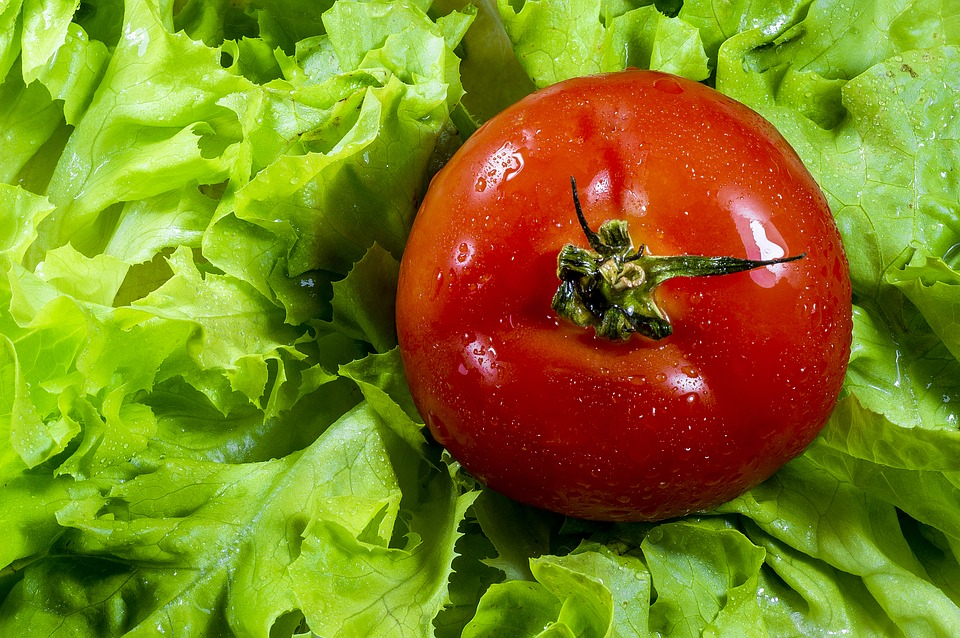

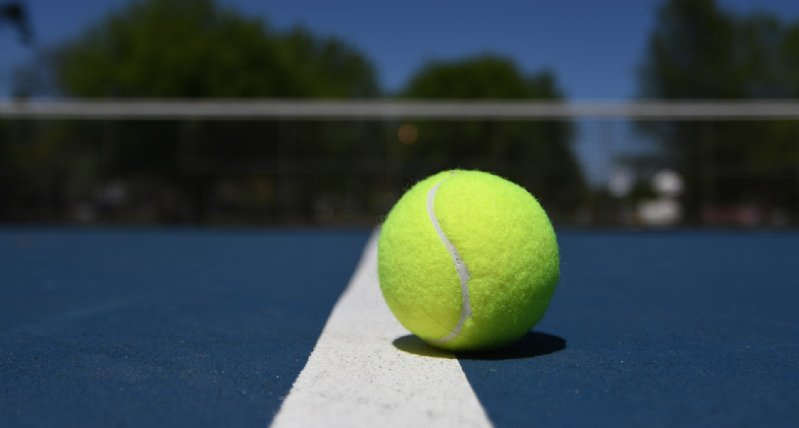

In [2]:
!wget https://cdn.pixabay.com/photo/2018/08/18/15/39/tomato-3614967_960_720.jpg -O salad.png 
!wget https://bit.ly/3Bxo9HJ -O tennisball.png
im_salad = cv2.imread('salad.png', cv2.IMREAD_COLOR)
im_tennis = cv2.imread('tennisball.png', cv2.IMREAD_COLOR)
cv2_imshow(im_salad)
cv2_imshow(im_tennis)

In [73]:
#Auxiliary Function to plot side by side
def plot_sidebyside(img_list,titles,colormap=None):
  n = len(img_list)
  figure, axis = plt.subplots(1, n, figsize=(18,14))
  
  for i in range(n):  
    axis[i].imshow(img_list[i], cmap=colormap)
    axis[i].set_title(titles[i])

  # Combine all the operations and display
  plt.show()


# THE RGB SPACE 
Consider the tomato image.

One can argue that we can split the red channel to solve the problem. This rationale is invalid since the color is composed by addition in RGB. 

So, the other colors also have a portion of red.

Take a look! We have downsized the image to visualize it better

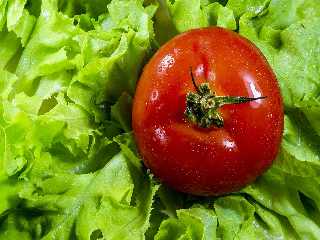

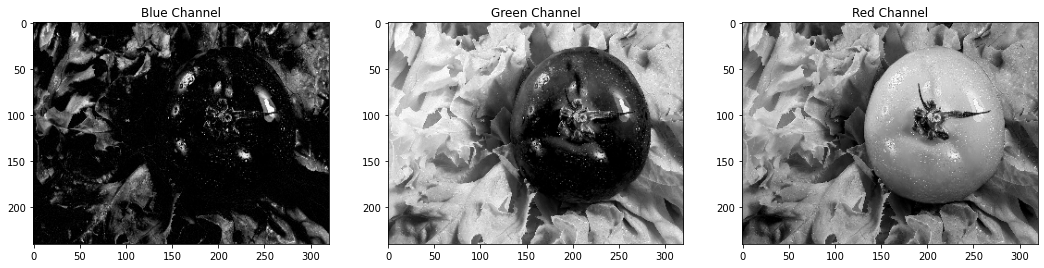

In [74]:
salad = cv2.imread("salad.png", cv2.IMREAD_COLOR)

#DownSize o 320x240 to better visualize
salad = cv2.resize(salad,(320,240))

ch_b = salad[:,:,0]
ch_g = salad[:,:,1]
ch_r = salad[:,:,2]
cv2_imshow(salad)

plot_sidebyside([ch_b,ch_g,ch_r],["Blue Channel", "Green Channel", "Red Channel"],colormap='gray')

#Thresholding 

Let´s show how to find a threshold to try to split the tomato.

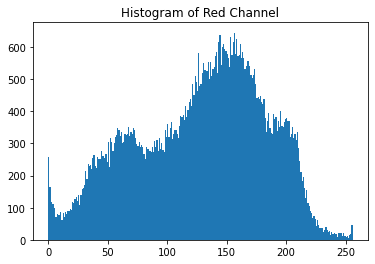

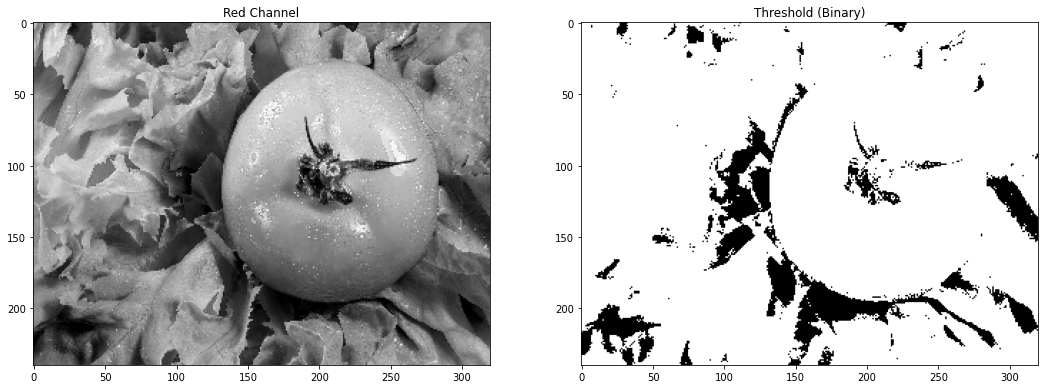

In [83]:
#First we compute the histogram
plt.title("Histogram of Red Channel")
plt.hist(ch_r.ravel(),256,[0,256]);
plt.show()

val = 50

_,thresh = cv2.threshold(ch_r,val,200,cv2.THRESH_BINARY)

plot_sidebyside([ch_r,thresh],["Red Channel","Threshold (Binary)"],colormap='gray')


How about the green channel?

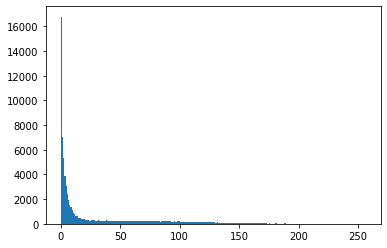

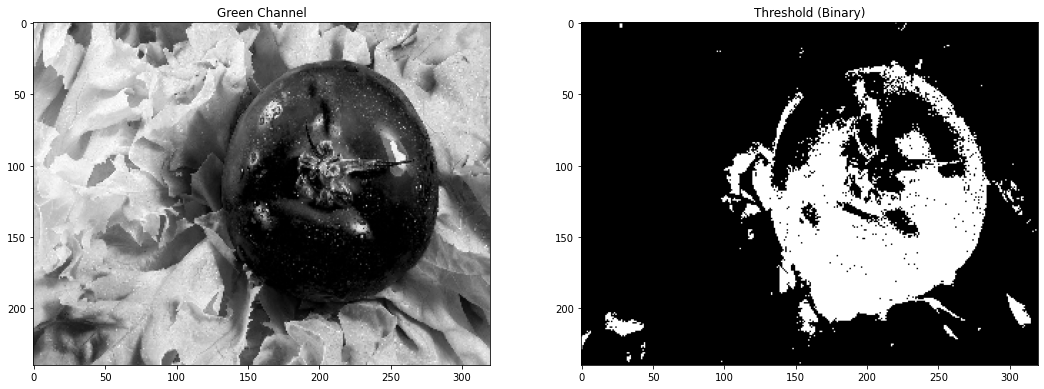

In [84]:
#First we compute the histogram
plt.hist(ch_b.ravel(),256,[0,256]); 
plt.show()

val = 50
_,thresh = cv2.threshold(ch_g,val,255,cv2.THRESH_BINARY_INV)
plot_sidebyside([ch_g,thresh],["Green Channel","Threshold (Binary)"],colormap='gray')

#HSV Space Color


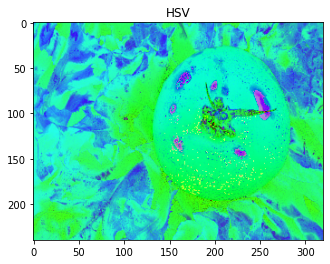

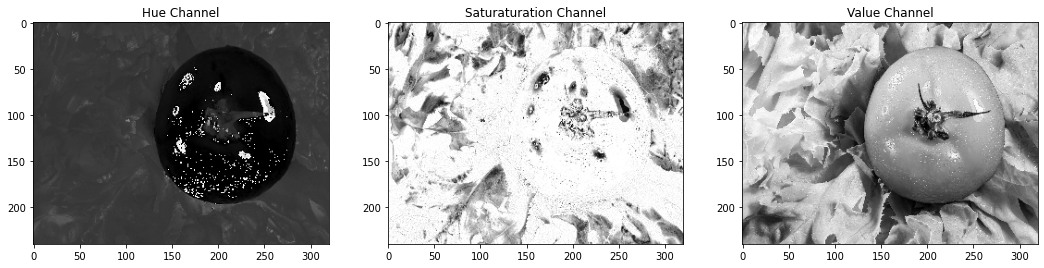

In [85]:
salad = cv2.imread("salad.png", cv2.IMREAD_COLOR)
salad = cv2.resize(salad,(320,240))
hsv = cv2.cvtColor(salad,cv2.COLOR_BGR2HSV)

plt.title("HSV")
plt.imshow(hsv,cmap='hsv')
plt.show()

H = hsv[:,:,0]
S = hsv[:,:,1]
V = hsv[:,:,2]
plot_sidebyside([H,S,V],["Hue Channel","Saturaturation Channel","Value Channel"],colormap='gray')



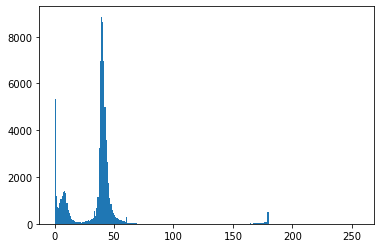

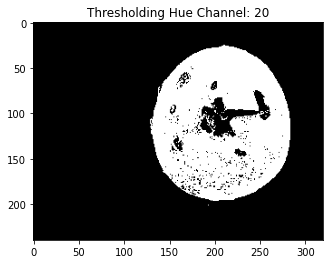

In [7]:
img = hsv[:,:,0]
plt.hist(img.ravel(),256,[0,256]); 
plt.show()

val = 20
_,thresh = cv2.threshold(img,val,255,cv2.THRESH_BINARY_INV)
plt.title("Thresholding Hue Channel: " + str(val))
plt.imshow(thresh,cmap='gray')
plt.show()

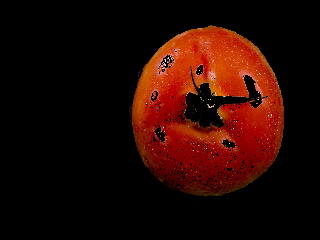

In [8]:
result = cv2.bitwise_and(salad,salad,mask=thresh)
cv2_imshow(result)

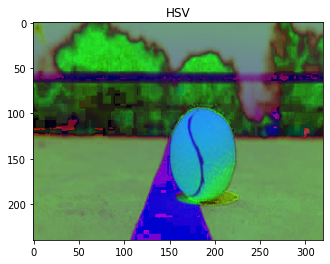

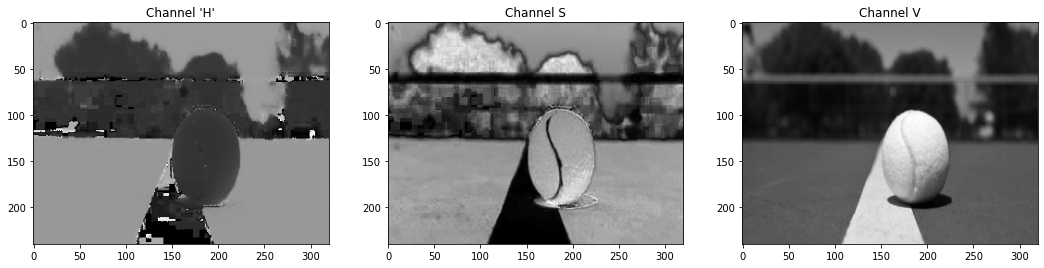

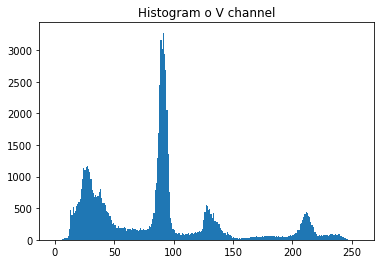

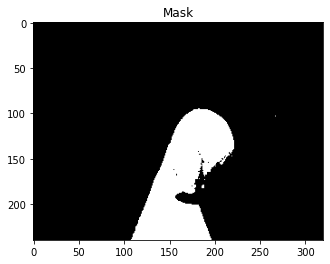

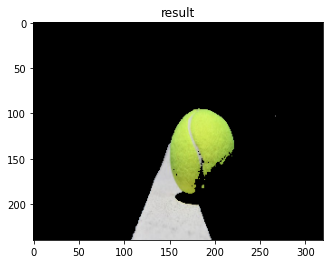

In [55]:
tennis = cv2.imread("tennisball.png", cv2.IMREAD_COLOR)
tennis = cv2.resize(tennis,(320,240))
hsv = cv2.cvtColor(tennis,cv2.COLOR_BGR2HSV)

plt.title("HSV")
plt.imshow(hsv,cmap='hsv')
plt.show()

#Lets show each channel of hsv
#Lets show each channel of hsv
figure, axis = plt.subplots(1, 3, figsize=(18,14))
  
# For Sine Function
axis[0].imshow(hsv[:,:,0], cmap='gray')
axis[0].set_title("Channel 'H'")
  
# For Cosine Function
axis[1].imshow(hsv[:,:,1], cmap='gray')
axis[1].set_title("Channel S")

# For Cosine Function
axis[2].imshow(hsv[:,:,2], cmap='gray')
axis[2].set_title("Channel V")
plt.show()

img = hsv[:,:,2]

plt.title("Histogram o V channel")
plt.hist(img.ravel(),256,[0,256]); 
plt.show()

val = 50
_,thresh = cv2.threshold(img,val,255,cv2.THRESH_BINARY_INV)
#plt.title("Thresholding Hue Channel: " + str(val))
#plt.imshow(thresh,cmap='gray')
#plt.show()

mask = cv2.inRange(img,160,255)

plt.title("Mask")
plt.imshow(mask,cmap='gray')
plt.show()
tennis = cv2.cvtColor(tennis,cv2.COLOR_RGB2BGR)
result = cv2.bitwise_and(tennis,tennis,mask=mask)
plt.title("result")

plt.imshow(result)
plt.show()